## Importing required modules

In [73]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
#OECD datasets are from its offical website as of date 21/11/2023 (indian standard time and indian format)
#https://stats.oecd.org/index.aspx?DataSetCode=BLI - for better life index
#https://stats.oecd.org/index.aspx?queryid=61433 - for gdp per capita

## Loading the datafraes, visualising it and merging them with relevant columns

In [74]:
oecd_bli=pd.read_csv("BLI.csv")
oecd_bli

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.4,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.8,NaN,NaN
4,CZE,Czechia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,CRI,Costa Rica,PS_REPH,Homicide rate,L,Value,MN,Men,RATIO,Ratio,0,Units,NaN,NaN,18.2,NaN,NaN
2365,CRI,Costa Rica,PS_REPH,Homicide rate,L,Value,WMN,Women,RATIO,Ratio,0,Units,NaN,NaN,1.8,NaN,NaN
2366,CRI,Costa Rica,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,22.0,NaN,NaN
2367,CRI,Costa Rica,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,27.9,NaN,NaN


In [75]:
set(oecd_bli["Indicator"])

{'Air pollution',
 'Dwellings without basic facilities',
 'Educational attainment',
 'Employees working very long hours',
 'Employment rate',
 'Feeling safe walking alone at night',
 'Homicide rate',
 'Household net adjusted disposable income',
 'Household net wealth',
 'Housing expenditure',
 'Labour market insecurity',
 'Life expectancy',
 'Life satisfaction',
 'Long-term unemployment rate',
 'Personal earnings',
 'Quality of support network',
 'Rooms per person',
 'Self-reported health',
 'Stakeholder engagement for developing regulations',
 'Student skills',
 'Time devoted to leisure and personal care',
 'Voter turnout',
 'Water quality',
 'Years in education'}

In [76]:
frame1=oecd_bli[oecd_bli["Indicator"]=="Life satisfaction"]

frame2=frame1[frame1["Inequality"]=="Total"]


oecd_ls=frame2[["LOCATION","Country","Indicator","Value"]]
oecd_ls

,LOCATION,Country,Indicator,Value
1722,AUS,Australia,Life satisfaction,7.1
1723,AUT,Austria,Life satisfaction,7.2
1724,BEL,Belgium,Life satisfaction,6.8
1725,CAN,Canada,Life satisfaction,7.0
1726,CZE,Czechia,Life satisfaction,6.9
1727,DNK,Denmark,Life satisfaction,7.5
1728,FIN,Finland,Life satisfaction,7.9
1729,FRA,France,Life satisfaction,6.7
1730,DEU,Germany,Life satisfaction,7.3
1731,GRC,Greece,Life satisfaction,5.8


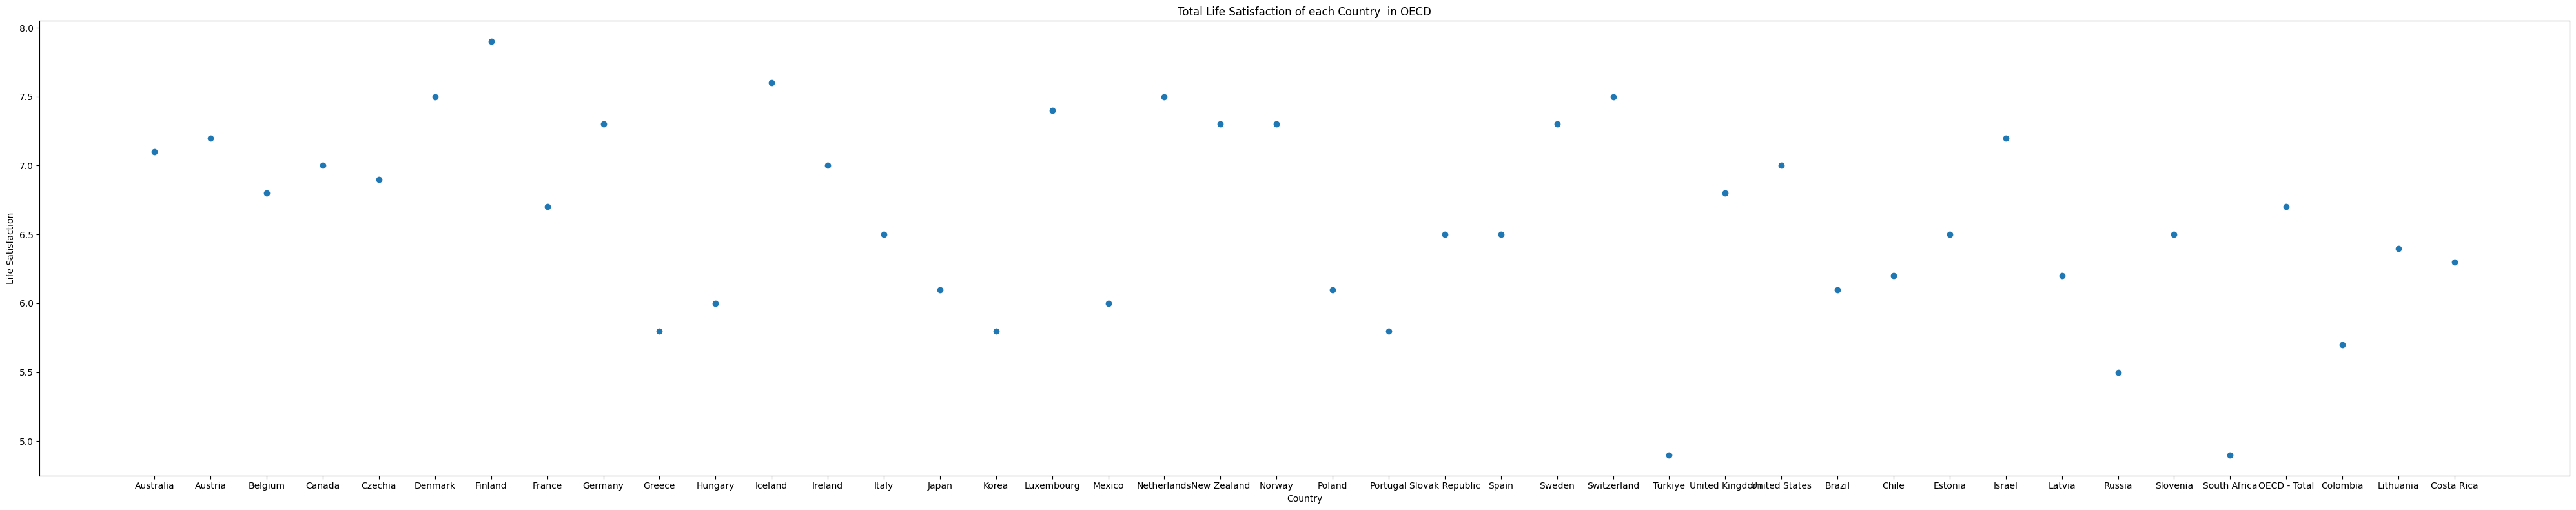

In [77]:
x=oecd_ls["Country"]
y=oecd_ls["Value"]

plt.figure(figsize=(40, 8))

plt.xlabel("Country")
plt.ylabel("Life Satisfaction")

plt.title("Total Life Satisfaction of each Country  in OECD")

plt.scatter(x,y)
plt.tight_layout()
plt.show()

In [78]:
oecd_final1=oecd_ls.drop("Indicator",axis=1)
oecd_final1

,LOCATION,Country,Value
1722,AUS,Australia,7.1
1723,AUT,Austria,7.2
1724,BEL,Belgium,6.8
1725,CAN,Canada,7.0
1726,CZE,Czechia,6.9
1727,DNK,Denmark,7.5
1728,FIN,Finland,7.9
1729,FRA,France,6.7
1730,DEU,Germany,7.3
1731,GRC,Greece,5.8


In [79]:
oecd_gdp=pd.read_csv("GDP.csv")
oecd_gdp1=oecd_gdp[oecd_gdp["Year"]==2022]
oecd_final2=oecd_gdp1[['LOCATION','Country','Value']]
oecd_final2

,LOCATION,Country,Value
6,AUS,Australia,69418.944207
13,AUT,Austria,67792.406005
20,BEL,Belgium,65509.386133
27,CAN,Canada,58347.676945
34,CZE,Czechia,49122.317085
41,DNK,Denmark,74859.416551
48,FIN,Finland,59461.616223
55,FRA,France,54988.881441
62,DEU,Germany,63521.899276
69,GRC,Greece,36574.041930


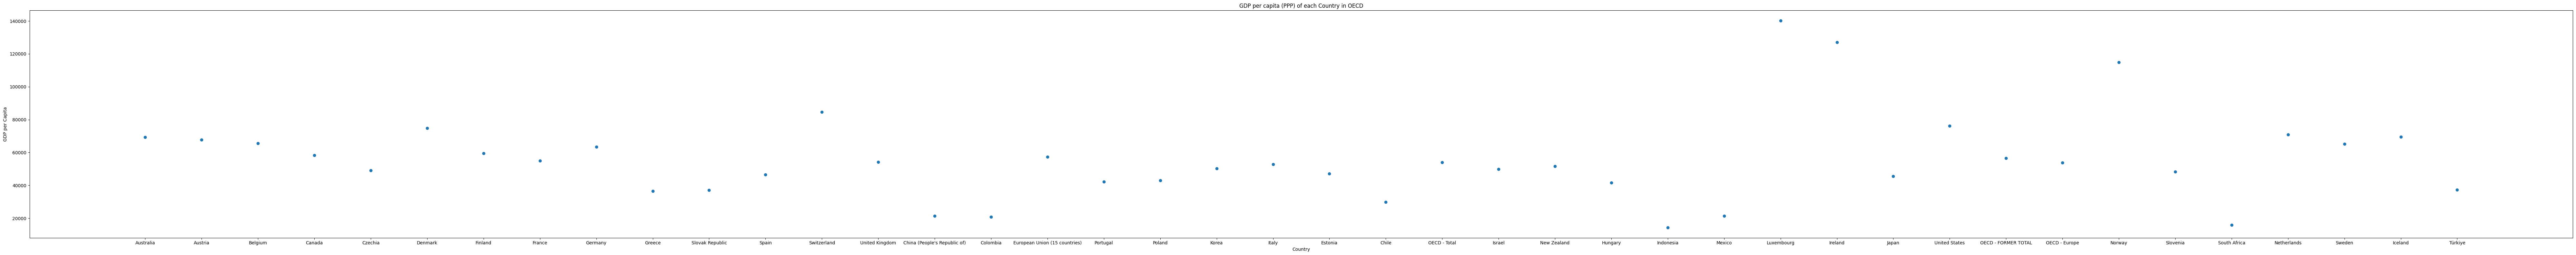

In [80]:
x=oecd_final2["Country"]
y=oecd_final2["Value"]

plt.figure(figsize=(80, 8))

plt.xlabel("Country")
plt.ylabel("GDP per Capita")

plt.title("GDP per capita (PPP) of each Country in OECD")

plt.scatter(x,y)
plt.tight_layout()
plt.show()

In [81]:
final_df=pd.merge(oecd_final1,oecd_final2,on="LOCATION",how="inner")
final_df.drop("Country_y",axis=1,inplace=True)
Final_df=final_df.rename(columns={'Country_x':'Country','Value_x':'Life Satisfaction','Value_y':"GDP per capita"})

dang=Final_df.isnull().sum()#checking for blank values
dang1=Final_df.info()

print(dang)
print()
print(dang1)
Final_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LOCATION           37 non-null     object 
 1   Country            37 non-null     object 
 2   Life Satisfaction  37 non-null     float64
 3   GDP per capita     37 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.3+ KB
LOCATION             0
Country              0
Life Satisfaction    0
GDP per capita       0
dtype: int64

None


,LOCATION,Country,Life Satisfaction,GDP per capita
0,AUS,Australia,7.1,69418.944207
1,AUT,Austria,7.2,67792.406005
2,BEL,Belgium,6.8,65509.386133
3,CAN,Canada,7.0,58347.676945
4,CZE,Czechia,6.9,49122.317085
5,DNK,Denmark,7.5,74859.416551
6,FIN,Finland,7.9,59461.616223
7,FRA,France,6.7,54988.881441
8,DEU,Germany,7.3,63521.899276
9,GRC,Greece,5.8,36574.041930


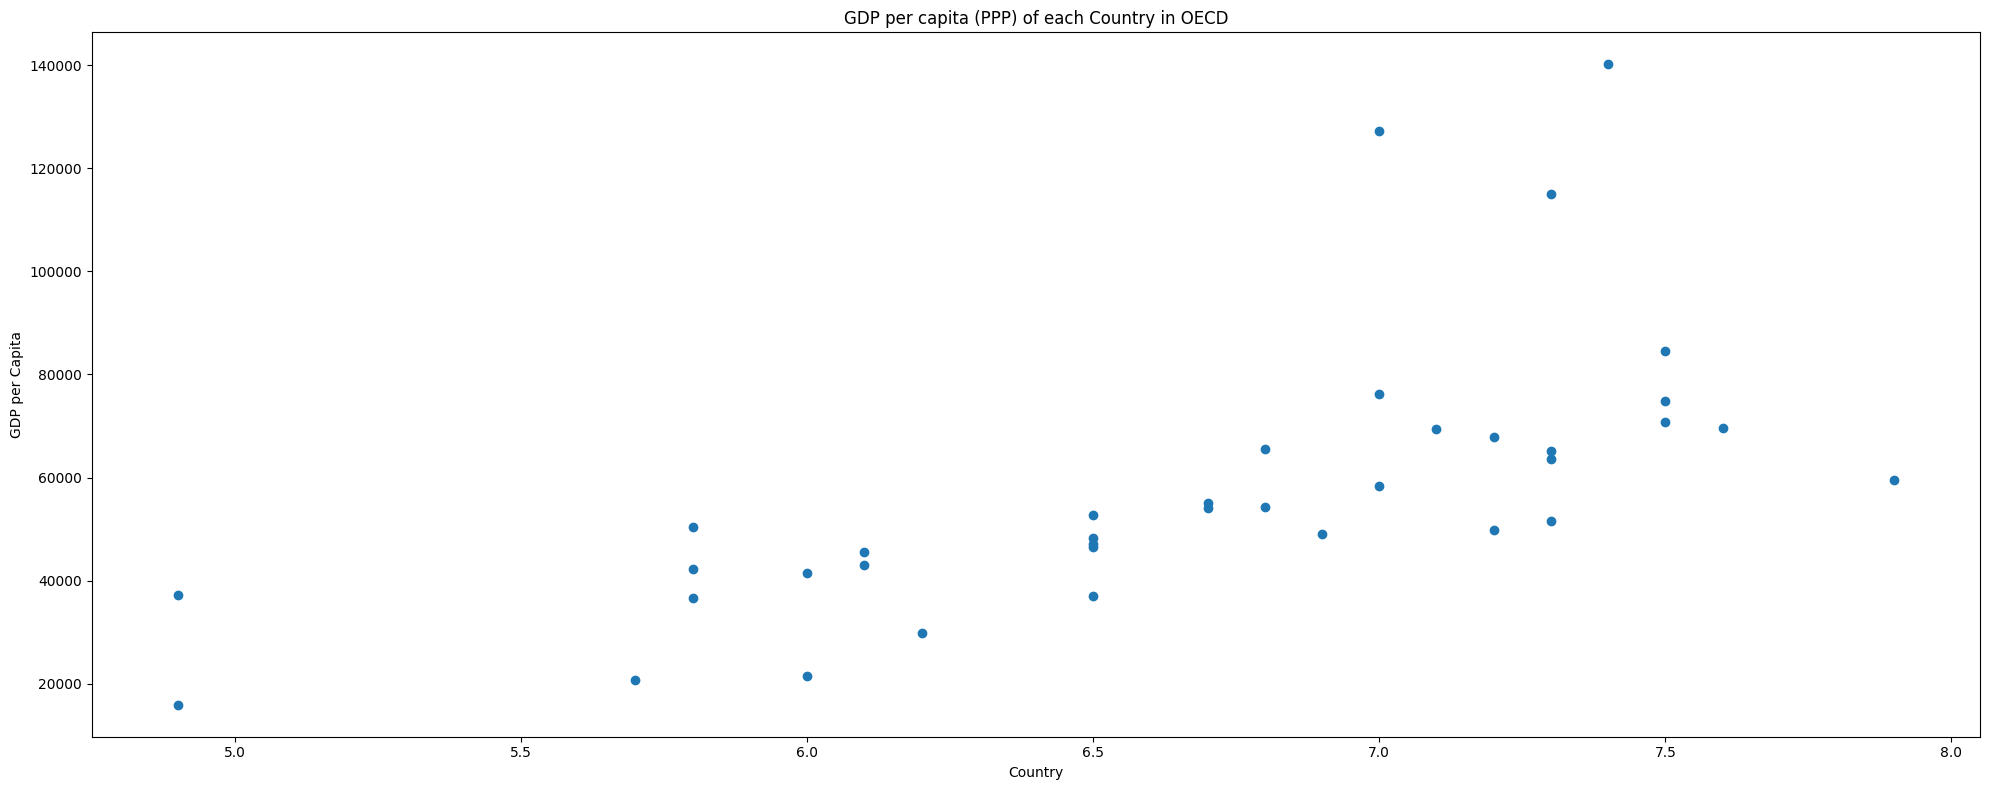

In [82]:
a=Final_df["Life Satisfaction"]
b=Final_df["GDP per capita"]

plt.figure(figsize=(20, 8))

plt.xlabel("Country")
plt.ylabel("GDP per Capita")

plt.title("GDP per capita (PPP) of each Country in OECD")

plt.scatter(a,b)
plt.tight_layout()
plt.show()

In [83]:
A=np.c_[Final_df['GDP per capita']]
B=np.c_[Final_df['Life Satisfaction']]
#Final_df.to_csv('OECD.csv',index=False), to get the final csv of manipulated data

##

## selecting a  model

In [84]:
from sklearn.linear_model import LinearRegression
model_LR=sklearn.linear_model.LinearRegression()
model_LR.fit(A,B)

LinearRegression()

In [85]:
from sklearn.neighbors import KNeighborsRegressor
model_KNN=sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
model_KNN.fit(A,B)

KNeighborsRegressor(n_neighbors=3)

## predicting based on this model

In [86]:
A_new=[[22587]]
print(model_LR.predict(A_new))
print()
print(model_KNN.predict(A_new))

[[6.03107497]]

[[5.53333333]]
